In [1]:

import os

import cv2

import zipfile

import numpy as np

from PIL import Image

from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def get_pixel(img, center, x, y): 
	new_value = 0
	try: 
		if img[x][y] >= center: 
			new_value = 1
			
	except: 
		pass
	return new_value 

    
def lbp_calculated_pixel(img, x, y): 

	center = img[x][y] 

	val_ar = [] 
	
	
	val_ar.append(get_pixel(img, center, x-1, y)) 
	
	val_ar.append(get_pixel(img, center, x-1, y + 1)) 
	
	val_ar.append(get_pixel(img, center, x, y + 1)) 
	 
	val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
	
	val_ar.append(get_pixel(img, center, x + 1, y)) 
	
	val_ar.append(get_pixel(img, center, x + 1, y-1)) 
	
	val_ar.append(get_pixel(img, center, x, y-1)) 
	
	power_val = [1, 2, 4, 8, 16, 32, 64, 128,256] 

	val = 0
	
	for i in range(len(val_ar)): 
		val += val_ar[i] * power_val[i] 
		
	return val 

In [3]:
def calc_hist(path):
    img_bgr = cv2.imread(path,  1) 
#     img_bgr = Image.open(path).convert('L')
    height, width, _ = img_bgr.shape 
#     print(height, width)
    img_gray = cv2.cvtColor(img_bgr, 
                            cv2.COLOR_BGR2GRAY) 


    img_lbp = np.zeros((height, width), 
                    np.uint8) 

    for i in range(0, height): 
        for j in range(0, width): 
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 

    # plt.imshow(img_bgr) 
    # plt.show()
#     print(img_lbp)
    # plt.imshow(img_lbp, cmap ="gray") 
    # plt.show() 

    val=plt.hist(img_lbp.ravel(),256,[0,256])

    return img_lbp

In [4]:
def get_image_data(directory_path) :
    paths = [os.path.join(directory_path, f) for f in sorted(os.listdir(directory_path), key=lambda x: int(x[1:]))]
    ids=[]
    faces=[]
    type(paths)    
    for subdir in paths:
        dirname = os.path.basename(subdir)
        
        for images in [os.path.join(subdir,f)for f in os.listdir(path=subdir)]:
            ids.append(int(dirname[1:]))
#                        +os.path.basename(images).split(".")[0])
            faces.append(calc_hist(images))
    return np.array(ids),faces 

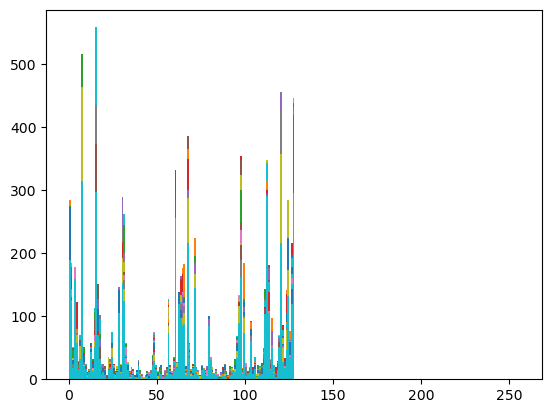

In [5]:
Y_test , X_test = get_image_data("D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\Faces\\Testing")
Y_train , X_train = get_image_data("D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\Faces\\Training")


Train Size - (306,)
Test Size - (54,)


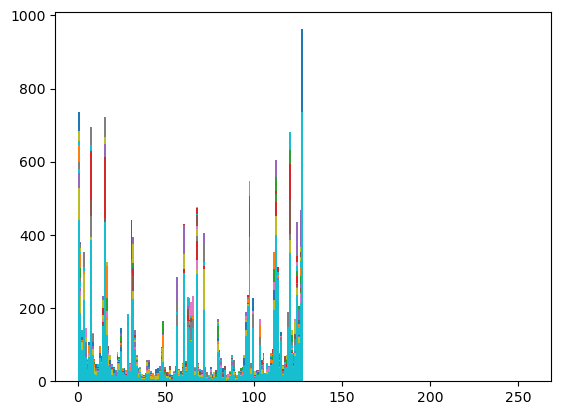

In [5]:
# i_d,f_a=get_image_data("D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Training")

# X_train,X_test,y_train,y_test=train_test_split(i_d,f_a, random_state=42, test_size=0.15)

# print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

In [6]:
print(np.array(X_train).shape)
# print(list(X_train)[1])
print(list(Y_train))


(295, 80, 70)
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 3

C:\Users\minnu\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


1
Accuracy: 0.71
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       0.33      1.00      0.50         2
           5       0.33      0.50      0.40         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      0.00      0.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.22      0.36         9
          14       1.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      0.00      0.00         1
          

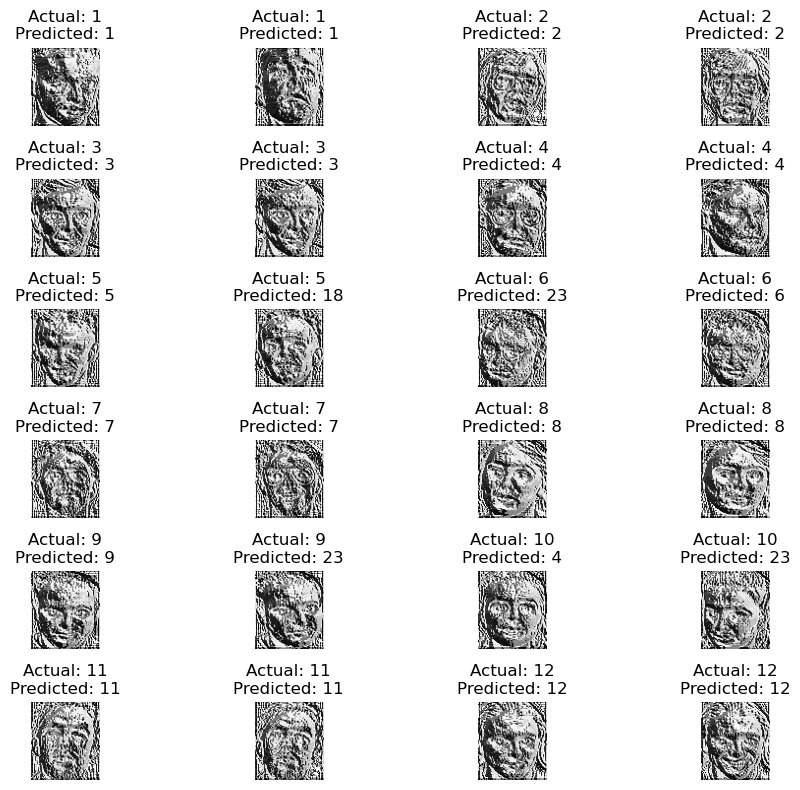

In [10]:
# Flatten the 3D arrays before stacking
faces_flatten_train = [face.flatten() for face in X_train]
faces_flatten_test = [face.flatten() for face in X_test]

# Convert the faces list to a NumPy array
X_train_flatten = np.array(faces_flatten_train)
X_test_flatten = np.array(faces_flatten_test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_test_scaled = scaler.transform(X_test_flatten)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

best_k = grid_search.best_params_['n_neighbors']

print(best_k)
# from sklearn.decomposition import PCA

# n_components = 50  # Adjust as needed
# pca = PCA(n_components=n_components)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)


# from skimage import transform

# augmented_faces = [transform.rotate(face.reshape(original_shape), angle=15, mode='edge').flatten() for face in X_train]
# X_train_augmented = np.vstack((X_train_flatten, augmented_faces))
# Y_train_augmented = np.hstack((Y_train, Y_train))  # Adjust labels accordingly

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
knn_classifier.fit(X_train_flatten, Y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_flatten)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report with zero_division parameter
print(classification_report(Y_test, y_pred, zero_division=1))

# Assuming the original images had dimensions (92, 112)
original_shape = (80, 70)

# Create a graph to visualize the predictions
fig, axes = plt.subplots(6, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    # Reshape the flattened image to its original shape
    ax.imshow(X_test[i].reshape(original_shape), cmap='gray')
    ax.set_title(f'Actual: {Y_test[i]}\nPredicted: {y_pred[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [1]:
# print(ids)

In [ ]:
# Print the number of unique labels in the training set
print(len(set(Y_train)))

# Create LBPH face recognizer
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()

# Train the recognizer
lbph_classifier.train(X_train, Y_train)

# Save the trained model
lbph_classifier.write('lbph_classifier.yml')


Size of flattened array: 10304
Predicted Label: 17
Accuracy: 87.02043932917763


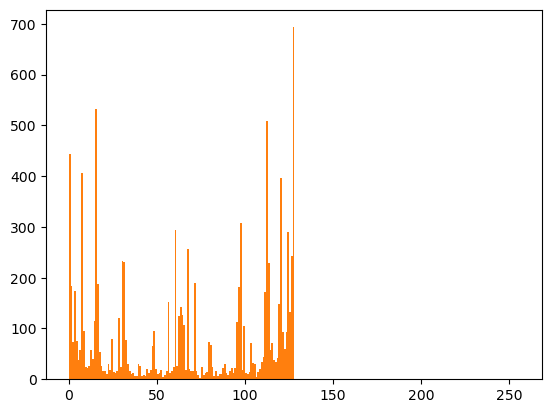

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Assuming calc_hist function is defined as in your previous code

# Load the LBPH face classifier
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("lbph_classifier.yml")

# Load and preprocess the test image
test_image = "D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\testing\\s12\\12.pgm"
image_np = calc_hist(test_image)

# Ensure the image is flattened before prediction
image_np_flat = image_np.flatten()

# Check the size of the flattened array
print("Size of flattened array:", len(image_np_flat))

# Reshape the flattened array to match the expected size (92, 112) for AT&T Faces dataset
image_np_flat = image_np_flat.reshape((92, 112)).astype(np.uint8)

# Predict the label and accuracy
label, accuracy = lbph_face_classifier.predict(image_np_flat)
print("Predicted Label:", label)
print("Accuracy:", accuracy)

# Visualize the histogram of the image
plt.hist(image_np.ravel(), 256, [0, 256])
plt.show()

# Display the image with predicted and expected labels
cv2.putText(image_np, 'Pred. ' + str(label), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Expec. ' + str(label), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.imshow("img", image_np)

# Construct the file path for displaying the original image
img_path = f"D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\training\\s{str(label)}\\1.pgm"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Get the expected label from the image filename
expected_output = int(os.path.split(test_image)[1].split(".")[0])
print("Expected Output:", expected_output)


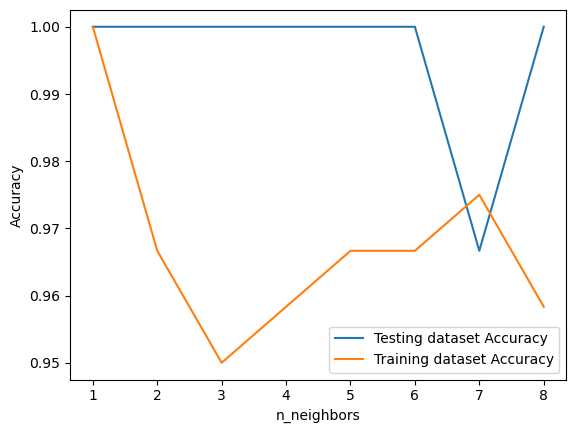

In [65]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute training and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Flatten the 2D arrays before stacking
X_train_flatten = [face.flatten() for face in X_train]
X_test_flatten = [face.flatten() for face in X_test]

# Convert the faces list to a NumPy array
X_train_flatten = np.array(X_train_flatten)
X_test_flatten = np.array(X_test_flatten)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flatten, Y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_flatten)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report with zero_division parameter
print(classification_report(Y_test, y_pred, zero_division=1))


# Assuming the original images had dimensions (92, 112)
original_shape = (80, 70)

# Create a graph to visualize the predictions
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    # Reshape the flattened image to its original shape
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f'Actual: {Y_test[i]}\nPredicted: {y_pred[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [39]:
def get_image_data(directory_path):
    paths = [os.path.join(directory_path, f) for f in sorted(os.listdir(directory_path), key=lambda x: int(x[1:]))]
    print(paths)

get_image_data("D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing")


['D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s1', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s2', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s3', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s4', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s5', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s6', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s7', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s8', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Recognition-master\\Datasets\\att_faces\\Testing\\s9', 'D:\\Downloads\\Face-Recognition-master (1)\\Face-Reco